В данной домашней работе все задачи — практические. В них необходимо попытаться применить все возможные инструменты, которые мы изучали, чтобы ответить на заданный в задаче вопрос. Не забывайте об одном из самых важных инструментов — визуализации. Ваши решения необходимо сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа.

Все сопутсвующие файлы находятся в папке hw_2_data

Упражнение 1. В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?

Упражнение 2. В файле weights.txt записан вес пациентов мужского и женского пола. Есть ли значимые различия в весе мужчин и женщин?

Упражнение 3. В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?

Упражнение 4. В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.

### Упражнение 1. Эффективность терапии анорексии

Анализ данных:

Для оценки эффективности терапии проведём парный t-тест, сравнив средние веса до и после терапии.

Статистический анализ:

Парный t-тест:
   - Гипотезы:
     - Нулевая гипотеза (H0): Среднее изменение веса равно нулю (терапия не эффективна).
     - Альтернативная гипотеза (H1): Среднее изменение веса не равно нулю (терапия эффективна).

In [ ]:

   import pandas as pd
   from scipy import stats
   import matplotlib.pyplot as plt
   import seaborn as sns
   import matplotlib.pyplot as plt
   from IPython.display import display

   data = pd.read_csv('anorexia.txt', sep='\t')
   display(data)
   before = data['Before']
   after = data['After']

   # Парный t-тест
   t_stat, p_value = stats.ttest_rel(after, before)

   print(f"T-Statistic: {t_stat}, P-Value: {p_value}")



,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4
5,88.7,103.6
6,94.9,98.4
7,76.3,93.4
8,81.0,73.4
9,80.5,82.1


T-Statistic: 2.2155878439311656, P-Value: 0.03502259756218884


Результаты:

- Среднее изменение веса: Рассчитаем среднее изменение веса.

In [ ]:

  change = after - before
  mean_change = change.mean()
  print(f"Среднее изменение веса: {mean_change:.2f} кг")



Среднее изменение веса: 3.01 кг


In [ ]:
df = pd.DataFrame(data)
df['Difference'] = df['After'] - df['Before']
df.head()

,Before,After,Difference
0,80.5,82.2,1.7
1,84.9,85.6,0.7
2,81.5,81.4,-0.1
3,82.6,81.9,-0.7
4,79.9,76.4,-3.5


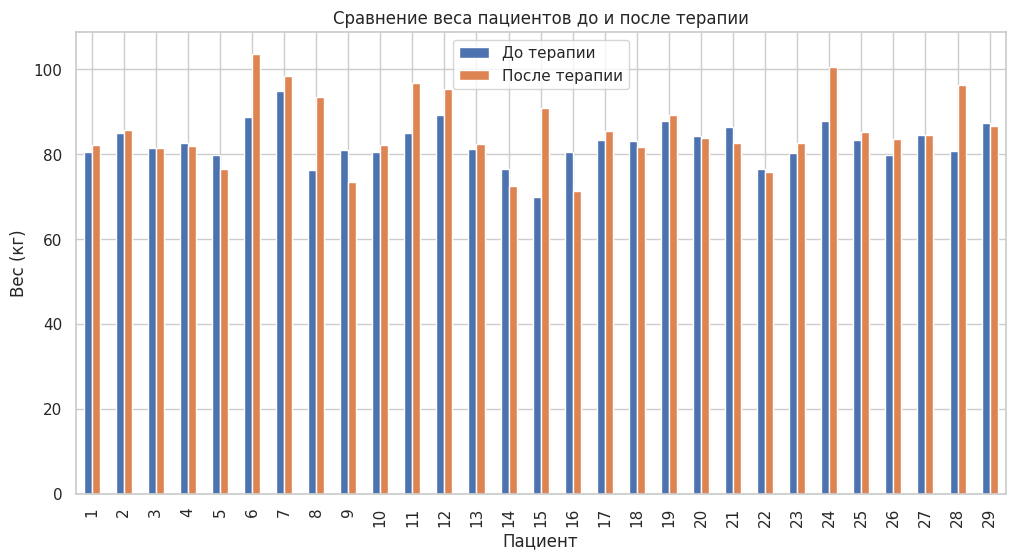

In [ ]:
sns.set(style='whitegrid')

# Построение графика
plt.figure(figsize=(12, 6))
df[['Before', 'After']].plot(kind='bar', ax=plt.gca())
plt.xlabel('Пациент')
plt.ylabel('Вес (кг)')
plt.title('Сравнение веса пациентов до и после терапии')
plt.xticks(ticks=range(len(df)), labels=range(1, len(df)+1))
plt.legend(['До терапии', 'После терапии'])
plt.show()

- t-Statistic и P-Value: P-Value < 0.05, отвергаем H₀.

Выводы:

Если результаты t-теста показывают статистически значимое увеличение или уменьшение веса, можно заключить, что терапия была эффективна. Например, среднее изменение веса положительно и P-Value < 0.05, терапия привела к увеличению веса, что свидетельствует об её эффективности.

### Упражнение 2. Различия в весе мужчин и женщин

Статистический анализ:

1. Проверка нормальности распределений:
   - Используем тест Шапиро-Уилка для каждой группы.

2. Проверка равенства дисперсий:
   - Используем тест Левена.

3. Выбор теста:
   - Если данные нормально распределены и дисперсии равны: независимый t-тест.
   - В противном случае: непараметрический тест Манна-Уитни.

In [ ]:

   import pandas as pd
   from scipy import stats
   import matplotlib.pyplot as plt
   import seaborn as sns
   from IPython.display import display

   data = pd.read_csv('weights.txt', sep='\t')
   display(data)
   women = data[data['Group'] == 'Woman']['Weight']
   men = data[data['Group'] == 'Man']['Weight']

   # Проверка нормальности
   shapiro_w = stats.shapiro(women)
   shapiro_m = stats.shapiro(men)

   # Проверка равенства дисперсий
   levene_test = stats.levene(women, men)


   if shapiro_w.pvalue > 0.05 and shapiro_m.pvalue > 0.05:
       if levene_test.pvalue > 0.05:
           t_stat, p_value = stats.ttest_ind(women, men)
       else:
           t_stat, p_value = stats.ttest_ind(women, men, equal_var=False)
   else:
       t_stat, p_value = stats.mannwhitneyu(women, men)

   print(f"Статистика теста: {t_stat}, P-Value: {p_value}")



,Group,Weight
0,Woman,38.9
1,Woman,61.2
2,Woman,73.3
3,Woman,21.8
4,Woman,63.4
5,Woman,64.6
6,Woman,48.4
7,Woman,48.8
8,Woman,48.5
9,Woman,50.1


Статистика теста: -3.124146252379086, P-Value: 0.005861212279435217


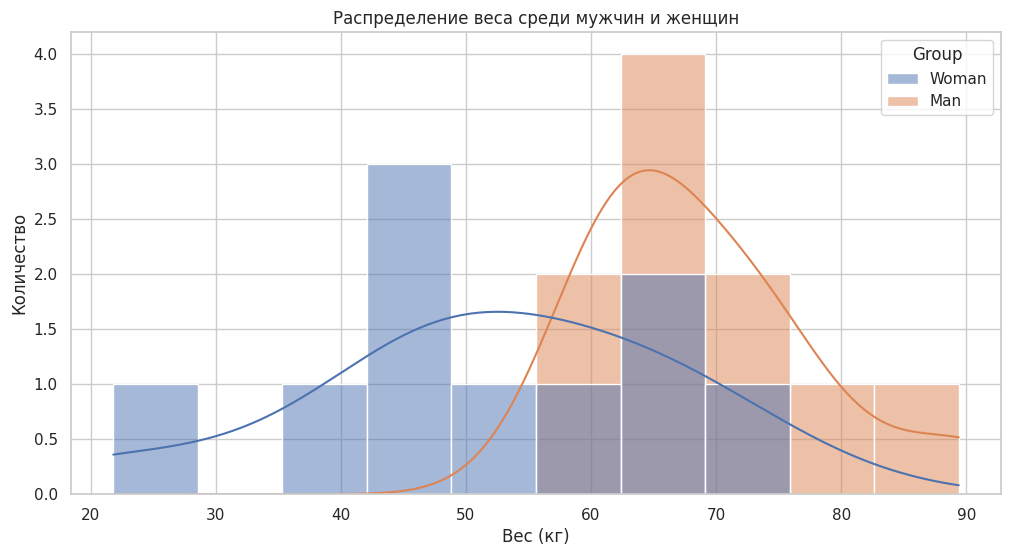

In [ ]:
df = pd.DataFrame(data)
df['Group'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Weight', hue='Group', kde=True, bins=10)
plt.title('Распределение веса среди мужчин и женщин')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество')
plt.show()

Выводы:

P-Value < 0.05, существует статистически значимая разница в среднем весе между мужчинами и женщинами. средний вес мужчин значительно выше, можно заключить, что мужчины в выборке тяжелее женщин.

### Упражнение 3. Изменение цен на недвижимость в Сиэтле за год

Анализ данных:

Необходимо определить, изменились ли в среднем цены за год.

Статистический анализ:

1. Проверка нормальности распределений:
   - Тест Шапиро-Уилка для каждого года.

2. Проверка равенства дисперсий:
   - Тест Левена.

3. Выбор теста:
   - Если данные нормально распределены и дисперсии равны: независимый t-тест.
   - В противном случае: непараметрический тест Манна-Уитни.

In [ ]:

   import pandas as pd
   from scipy import stats
   import matplotlib.pyplot as plt
   import seaborn as sns
   from IPython.display import display


   data = pd.read_csv('seattle.txt', sep='\t')
   display(data)
   price_2001 = data[data['Year'] == 2001]['Price']
   price_2002 = data[data['Year'] == 2002]['Price']

   # Проверка нормальности
   shapiro_2001 = stats.shapiro(price_2001)
   shapiro_2002 = stats.shapiro(price_2002)

   # Проверка равенства дисперсий
   levene_test = stats.levene(price_2001, price_2002)

   # Выбор теста
   if shapiro_2001.pvalue > 0.05 and shapiro_2002.pvalue > 0.05:
       if levene_test.pvalue > 0.05:
           t_stat, p_value = stats.ttest_ind(price_2001, price_2002)
       else:
           t_stat, p_value = stats.ttest_ind(price_2001, price_2002, equal_var=False)
   else:
       t_stat, p_value = stats.mannwhitneyu(price_2001, price_2002)

   print(f"Статистика теста: {t_stat}, P-Value: {p_value}")



Статистика теста: 1295.5, P-Value: 0.7563872675701748


Выводы:

P-Value > 0.05, можно заключить, что в среднем цены на недвижимость не изменились за год.

### Упражнение 4. Эффект препарата метилфенидат

Дизайн исследования:

Используется дизайн с повторными измерениями (каждый пациент принимал как плацебо, так и препарат). Это позволяет использовать парный t-тест для сравнения результатов.

Статистический анализ:

1. Парный t-тест:
   - Гипотезы:
     - H₀: Среднее изменение равно нулю (препарат не влияет).
     - H₁: Среднее изменение не равно нулю (препарат влияет).
2. Расчёт:

In [ ]:

   import pandas as pd
   from scipy import stats
   import matplotlib.pyplot as plt
   import seaborn as sns
   from IPython.display import display

   data = pd.read_csv('methylphenidate.txt', sep='\t')
   display(data)
   placebo = data['Placebo']
   methylphenidate = data['Methylphenidate']

   # Парный t-тест
   t_stat, p_value = stats.ttest_rel(methylphenidate, placebo)

   print(f"T-Statistic: {t_stat}, P-Value: {p_value}")



,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38
5,38,36
6,71,77
7,33,51
8,34,45
9,53,42


T-Statistic: 3.222362445123041, P-Value: 0.003771488176381471


Выводы:

P-Value < 0.05 , можно заключить, что метилфенидат значительно улучшает способность к подавлению импульсивных реакций по сравнению с плацебо.